In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

**Задание 1.** Загрузите набор данных `cardiovascular_disease.csv`. Описание данной задачи приведено в приложенном pdf-файле. Проведите первичный анализ данных. Возраст пациентов указан в днях. Создайте вместо него новый признак "возраст в годах", а также с помощью One-hot-encoding преобразуйте признаки `cholesterol` и `gluc` (можно воспользоваться функцией `pandas.get_dummmies`).

In [2]:
df = pd.read_csv('cardiovascular_disease.csv')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df['age_in_years'] = df['age'] // 365
df = df.drop('age', axis=1)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,1,165,64.0,130,70,3,1,0,0,0,1,51
3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,1,156,56.0,100,60,1,1,0,0,0,0,47


In [4]:
df['cholesterol_above_normal'] = df['cholesterol'].replace({1 : 0, 2 : 1, 3 : 0})
df['cholesterol_well_above_normal'] = df['cholesterol'].replace({1 : 0, 2 : 0, 3 : 1})
df = df.drop('cholesterol', axis=1)

df['gluc_above_normal'] = df['gluc'].replace({1 : 0, 2 : 1, 3 : 0})
df['gluc_well_above_normal'] = df['gluc'].replace({1 : 0, 2 : 0, 3 : 1})
df = df.drop('gluc', axis=1)

df.head(10)

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_in_years,cholesterol_above_normal,cholesterol_well_above_normal,gluc_above_normal,gluc_well_above_normal
0,2,168,62.0,110,80,0,0,1,0,50,0,0,0,0
1,1,156,85.0,140,90,0,0,1,1,55,0,1,0,0
2,1,165,64.0,130,70,0,0,0,1,51,0,1,0,0
3,2,169,82.0,150,100,0,0,1,1,48,0,0,0,0
4,1,156,56.0,100,60,0,0,0,0,47,0,0,0,0
5,1,154,85.0,130,80,0,0,1,1,51,0,0,0,0
6,2,170,69.0,130,90,0,0,1,0,52,0,0,0,0
7,1,160,70.0,120,75,0,0,0,0,55,0,0,0,0
8,1,151,67.0,120,80,0,0,0,0,60,1,0,1,0
9,1,157,93.0,130,80,0,0,1,0,60,0,1,0,0


**Задание 2.** Разбейте выборку на обучающую и контрольную в соотношении 70%/30% (`sklearn.model_selection.train_test_split`).

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('cardio', axis=1).values
y = df['cardio'].values

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=7, shuffle=True)

**Задание 3.** Обучите на выборке `(X_train, y_train)` дерево решений глубины 3 (`max_depth=3`, не забудьте указать `random_state`). Визуализируйте дерево с помошью `sklearn.tree.export_graphviz`.  Какие 3 признака задействуются при прогнозе в построенном дереве решений?

In [8]:
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn import tree

In [9]:
treeModel = DecisionTreeClassifier(max_depth=3, random_state=7)
treeModel.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=7)

In [10]:
df.drop('cardio', axis=1).columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco',
       'active', 'age_in_years', 'cholesterol_above_normal',
       'cholesterol_well_above_normal', 'gluc_above_normal',
       'gluc_well_above_normal'],
      dtype='object')

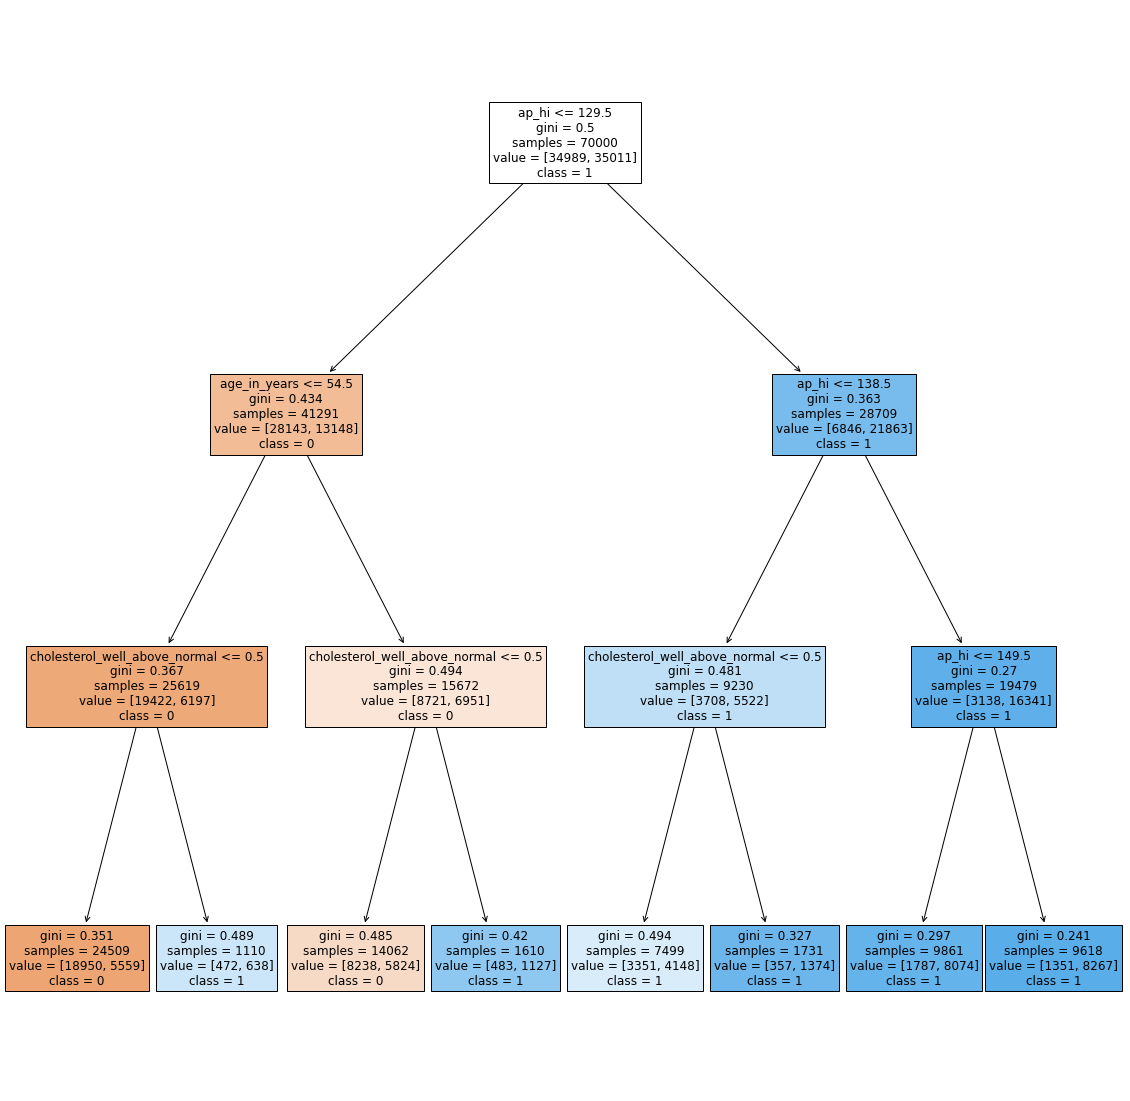

In [11]:
plt.figure(figsize=(20,20))
tree.plot_tree(treeModel, 
               feature_names=['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco',
                              'active', 'age_in_years', 'cholesterol_above_normal', 
                              'cholesterol_well_above_normal', 'gluc_above_normal', 
                              'gluc_well_above_normal'], 
               class_names=['0', '1'], 
               filled=True, fontsize=12)
plt.show()

**Задание 4.** Постройте предсказания для тестовой выборки и вычислите долю верных ответов на ней (`sklearn.metrics.accuracy_score`).

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
y_pred = treeModel.predict(X_test)

In [14]:
accuracy_score(Y_test, y_pred)

0.7282333333333333

**Задание 5.** Воспользуйтесь функцией `sklearn.model_selection.GridSearchCV`, чтобы определить оптимальную глубину решающего дерева методом кросс-валидации по 5 блокам. Зафиксируйте у дерева `random_state`. Рассмотрите значения параметра `max_depth` от 2 до 10. 

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
mdl = DecisionTreeClassifier(random_state=7)

In [17]:
list(range(2,11))

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [18]:
param_grid = dict( max_depth = list(range(2,11)) )

In [19]:
grid = GridSearchCV(mdl, param_grid)

In [20]:
grid.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=7),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [21]:
param_grid

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

**Задание 6.** Отобразите на графике, как меняется accuracy на кросс-валидации в зависимости от значения `max_depth`. Выведите лучшее значение `max_depth`.

In [22]:
grid.best_params_

{'max_depth': 7}

In [23]:
dataOfResRFC = pd.DataFrame(grid.cv_results_)
dataOfResRFC.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.039001,0.002170,0.001803,0.000399,2,{'max_depth': 2},0.707571,0.718071,0.720214,0.717929,0.707929,0.714343,0.005445,9
1,0.052617,0.010305,0.001999,0.000004,3,{'max_depth': 3},0.719286,0.730429,0.730143,0.730357,0.719429,0.725929,0.005367,8
2,0.061931,0.003953,0.002101,0.000666,4,{'max_depth': 4},0.721000,0.736071,0.732143,0.732214,0.723786,0.729043,0.005681,5
3,0.068202,0.005008,0.001199,0.000979,5,{'max_depth': 5},0.726571,0.734714,0.736143,0.730571,0.721357,0.729871,0.005416,3
4,0.097739,0.017218,0.001602,0.000801,6,{'max_depth': 6},0.726143,0.735643,0.735857,0.732214,0.722929,0.730557,0.005184,2


In [24]:
max_depth = dataOfResRFC['mean_test_score'].values

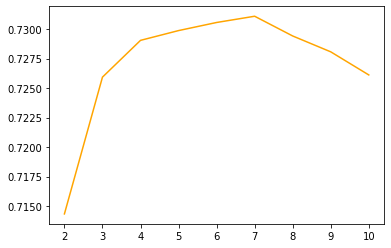

In [25]:
x_SGD = list(range(9))
xTicks = list(range(2,11))
pl.xticks(range(9), xTicks)
pl.plot(x_SGD, max_depth, color='orange')

**Задание 7.**

Создайте бинарные признаки, примерно соответствующие картинке ниже:
- $age \in [45,50), \ldots age \in [60,65) $ (4 признака);
- верхнее артериальное давление: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 признака).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/SCORE2007.png/900px-SCORE2007.png">

In [26]:
df['age[45,50)'] = 0
df['age[50,55)'] = 0
df['age[55,60)'] = 0
df['age[60,65)'] = 0

In [27]:
df['age[45,50)'].loc[df[(df['age_in_years'] >= 45) & (df['age_in_years'] < 50)].index] = 1
df['age[50,55)'].loc[df[(df['age_in_years'] >= 50) & (df['age_in_years'] < 55)].index] = 1
df['age[55,60)'].loc[df[(df['age_in_years'] >= 55) & (df['age_in_years'] < 60)].index] = 1
df['age[60,65)'].loc[df[(df['age_in_years'] >= 60) & (df['age_in_years'] < 65)].index] = 1
df.head()

c:\program files\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\program files\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\program files\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_in_years,cholesterol_above_normal,cholesterol_well_above_normal,gluc_above_normal,gluc_well_above_normal,"age[45,50)","age[50,55)","age[55,60)","age[60,65)"
0,2,168,62.0,110,80,0,0,1,0,50,0,0,0,0,0,1,0,0
1,1,156,85.0,140,90,0,0,1,1,55,0,1,0,0,0,0,1,0
2,1,165,64.0,130,70,0,0,0,1,51,0,1,0,0,0,1,0,0
3,2,169,82.0,150,100,0,0,1,1,48,0,0,0,0,1,0,0,0
4,1,156,56.0,100,60,0,0,0,0,47,0,0,0,0,1,0,0,0


In [28]:
df['ap_hi[120,140)'] = 0
df['ap_hi[140,160)'] = 0
df['ap_hi[160,180)'] = 0

In [29]:
df['ap_hi[120,140)'].loc[df[(df['ap_hi'] >= 120) & (df['ap_hi'] < 140)].index] = 1
df['ap_hi[140,160)'].loc[df[(df['ap_hi'] >= 140) & (df['ap_hi'] < 160)].index] = 1
df['ap_hi[160,180)'].loc[df[(df['ap_hi'] >= 160) & (df['ap_hi'] < 180)].index] = 1
df.head()

c:\program files\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\program files\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\program files\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_in_years,...,cholesterol_well_above_normal,gluc_above_normal,gluc_well_above_normal,"age[45,50)","age[50,55)","age[55,60)","age[60,65)","ap_hi[120,140)","ap_hi[140,160)","ap_hi[160,180)"
0,2,168,62.0,110,80,0,0,1,0,50,...,0,0,0,0,1,0,0,0,0,0
1,1,156,85.0,140,90,0,0,1,1,55,...,1,0,0,0,0,1,0,0,1,0
2,1,165,64.0,130,70,0,0,0,1,51,...,1,0,0,0,1,0,0,1,0,0
3,2,169,82.0,150,100,0,0,1,1,48,...,0,0,0,1,0,0,0,0,1,0
4,1,156,56.0,100,60,0,0,0,0,47,...,0,0,0,1,0,0,0,0,0,0


**Задание 8.** Построим дерево решений на полученных из шкалы SCORE признаках, а также с признаками `smoke`, `cholesterol` (после OHE)  и `gender`. Значения признака `gender` преобразуйте в 0 и 1.

Постройте дерево решений глубины 3 на **исходной** обучающей выборке. Используйте `DecisionTreeClassifier`. Какой бинарный признак оказался в корне построенного дерева решений?

In [30]:
df['gender'] = df['gender'].replace({1 : 0, 2 : 1})

In [31]:
df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco',
       'active', 'cardio', 'age_in_years', 'cholesterol_above_normal',
       'cholesterol_well_above_normal', 'gluc_above_normal',
       'gluc_well_above_normal', 'age[45,50)', 'age[50,55)', 'age[55,60)',
       'age[60,65)', 'ap_hi[120,140)', 'ap_hi[140,160)', 'ap_hi[160,180)'],
      dtype='object')

In [34]:
newData = df[['gender', 'cholesterol_above_normal', 'cholesterol_well_above_normal', 'gluc_above_normal',
       'gluc_well_above_normal', 'age[45,50)', 'age[50,55)', 'age[55,60)',
       'age[60,65)', 'ap_hi[120,140)', 'ap_hi[140,160)', 'ap_hi[160,180)', 'cardio']]
newData

,gender,cholesterol_above_normal,cholesterol_well_above_normal,gluc_above_normal,gluc_well_above_normal,"age[45,50)","age[50,55)","age[55,60)","age[60,65)","ap_hi[120,140)","ap_hi[140,160)","ap_hi[160,180)",cardio
0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,1,0,1
2,0,0,1,0,0,0,1,0,0,1,0,0,1
3,1,0,0,0,0,1,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1,0,1,0,0,0,0,1,0,1,0,1
99996,1,0,1,0,0,0,1,0,0,0,0,0,1
99997,1,0,1,0,0,0,0,0,0,1,0,0,1
99998,0,0,0,1,0,0,0,0,1,1,0,0,1


In [35]:
X = newData.drop('cardio', axis=1).values
y = newData['cardio'].values

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=7, shuffle=True)

In [38]:
model = DecisionTreeClassifier(max_depth=3, random_state=7)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=7)

In [40]:
y_pred = model.predict(X_test)
accuracy_score(Y_test, y_pred)

0.7047333333333333

In [39]:
newData.drop('cardio', axis=1).columns

Index(['gender', 'cholesterol_above_normal', 'cholesterol_well_above_normal',
       'gluc_above_normal', 'gluc_well_above_normal', 'age[45,50)',
       'age[50,55)', 'age[55,60)', 'age[60,65)', 'ap_hi[120,140)',
       'ap_hi[140,160)', 'ap_hi[160,180)'],
      dtype='object')

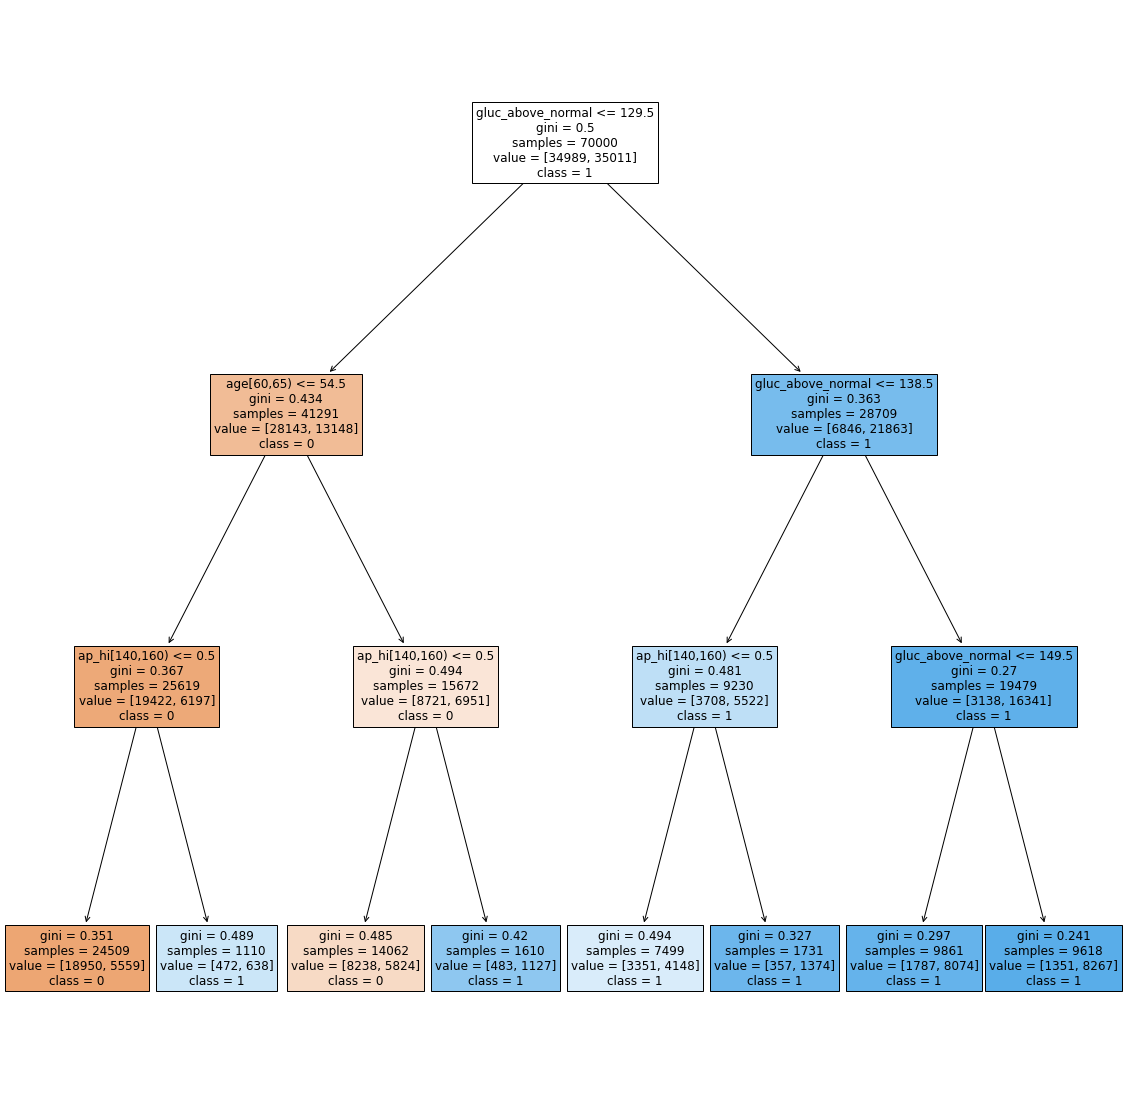

In [41]:
plt.figure(figsize=(20,20))
tree.plot_tree(treeModel, 
               feature_names=['gender', 'cholesterol_above_normal', 'cholesterol_well_above_normal',
                              'gluc_above_normal', 'gluc_well_above_normal', 'age[45,50)',
                              'age[50,55)', 'age[55,60)', 'age[60,65)', 'ap_hi[120,140)', 
                              'ap_hi[140,160)', 'ap_hi[160,180)'], 
               class_names=['0', '1'], 
               filled=True, fontsize=12)
plt.show()